# Knight ML Assignment
### Coded By Ali Al Housseini
### Emails: a_h9@bk.ru / alih999954@gmail.com


<b> Context </b>
* Imagine you are working as a Data Scientist for an Online Wine Shop named “The Wine Land” 
* As the name suggests, the online store specializes in selling different varieties of wines.
* The online store receives a decent amount of traffic and reviews from its users.
* Leverage the “reviews” data and draw actionable insights from it.


<b> What is Expected? </b>
* Build a predictive model for predicting the wine “variety”. Provide the output along with all features to a CSV file. Both Training & test data is provided here
* Submit the source code used for building models in a zip or share the link to the GitHub repository.
* Also submit a short summary: Model used, features extracted, Model accuracy in train. Along with some visualization of data and top 5 actionable Insights from the Data.


In [65]:
#importing needed libraries (some libraries may be imported after)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [66]:
#before go to clean the dataset ( train and test ) let's see the dataset how it looks
df=pd.read_csv("train.csv")
df.head(12)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
5,@wineschach,Argentina,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,85,13.0,Other,San Juan,NaN,Andean,Cabernet Sauvignon
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
9,@kerinokeefe,Italy,Mannucci Droandi 2009 Ceppeto Riserva (Chiant...,This blend of Sangiovese and 10% Merlot opens ...,Ceppeto Riserva,86,31.0,Tuscany,Chianti Classico,NaN,Mannucci Droandi,Red Blend


<b>The Data Description is as follows:</b>
* user_name - user_name of the reviewer
* country -The country that the wine is from.
* review_title - The title of the wine review, which often contains the vintage.
* review_description - A verbose review of the wine.
* designation - The vineyard within the winery where the grapes that made the wine are from.
* points - ratings given by the user. The ratings are between 0 -100.
* price - The cost for a bottle of the wine
* province - The province or state that the wine is from.
* region_1 - The wine-growing area in a province or state (ie Napa).
* region_2 - Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.
* winery - The winery that made the wine
* variety - The type of grapes used to make the wine. Dependent variable for task 2 of the assignment


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [68]:
df.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


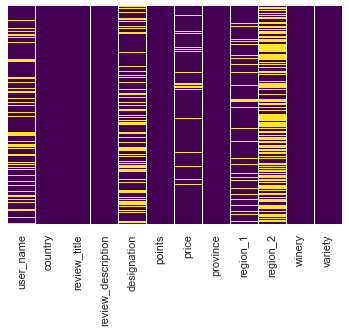

In [69]:
#checking the missing values for cleaning the data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Description of Model and working path
* As we see, we need now to clean the data first, cleaning the data is by predict the missing cells.
* Then we need to plot some graphs, hists, heatmaps and so on.. To study the realations between the columns.
* After it, we will gain a better idea about the realtions between these features and we use the best model.
* In case of a row, that does not contains sufficient values (many cells of NaN) we need to forget it.
* Refering to the heatmap above, we see the column "region_2" contains a lot of NaN value. So we will drop it.
* And also the column username_that we don't need to use it in our work.
* For predicting the price, we can refer to the other columns to get an approximetly price.
* A good note: Maybe we can find a relation between countries and varieties, because as we know, every winery is specific for making an exact type of wine.

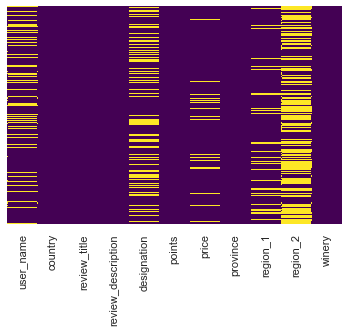

In [70]:
df2=pd.read_csv('test.csv')
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#After looking to the test set also, we can say that we a have an idea more clearly about the columns that we need to drop.

In [71]:
#droping user_name for now and try to clean other features
df.drop(columns=['user_name'],axis=1,inplace=True)
df2.drop(columns=['user_name'],axis=1,inplace=True)

In [72]:
x=df[df['region_1'].isnull()]
print("The column of RG1 contains of null values",x.shape[0],"and RG2 contains",x['region_2'].notnull().shape[0])
print("We can't find non null values in RG2 where RG1 is null ..!")

The column of RG1 contains of null values 12754 and RG2 contains 12754
We can't find non null values in RG2 where RG1 is null ..!


In [73]:
#droping user_name for now and try to clean other features
df.drop(columns=['region_2'],axis=1,inplace=True)
df2.drop(columns=['region_2'],axis=1,inplace=True)

## Study of dataset

In [74]:
df.isna().sum()

country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
winery                    0
variety                   0
dtype: int64

In [75]:
df2.isna().sum()

country                  4
review_title             0
review_description       0
designation           5989
points                   0
price                 1394
province                 4
region_1              3314
winery                   0
dtype: int64

In [76]:
train = df[['review_title','review_description','winery']]
test = df2[['review_title','review_description','winery']]
feature=df[['variety']]

In [77]:
train['winery'].value_counts()

Testarossa                  175
Louis Latour                168
Williams Selyem             165
Georges Duboeuf             163
Chateau Ste. Michelle       163
                           ... 
Malabaila                     1
Serena's Vineyard             1
Episode                       1
Domaine Michel Bouzereau      1
Château de Lagorce            1
Name: winery, Length: 13786, dtype: int64

In [78]:
train['review_title'].value_counts()

Korbel NV Brut Sparkling (California)                                8
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)               8
Ruinart NV Brut Rosé  (Champagne)                                    7
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                 7
Segura Viudas NV Extra Dry Sparkling (Cava)                          7
                                                                    ..
Alexander Valley Vineyards 2009 Cyrus Red (Alexander Valley)         1
Vista Hills 2009 Skyraider Reserve Pinot Noir (Willamette Valley)    1
Novy 2011 Syrah (Santa Lucia Highlands)                              1
Madroña 2004 Reserve Quintet Red (El Dorado)                         1
Peirano 2007 The Other White (Lodi)                                  1
Name: review_title, Length: 76983, dtype: int64

In [79]:
y=train.drop(['review_title','review_description'],axis=1)
def data_train(feature):
    top_10 = [x for x in y[feature].value_counts().sort_values(ascending=False).head(10).index]
    for label in top_10:
        y[label] = np.where(y[feature]==label,1,0)
    return y[[feature]+ top_10]

In [80]:
data_train('winery')

,winery,Testarossa,Louis Latour,Williams Selyem,Georges Duboeuf,Chateau Ste. Michelle,Wines & Winemakers,DFJ Vinhos,Columbia Crest,Concha y Toro,Kendall-Jackson
0,Andrew Peace,0,0,0,0,0,0,0,0,0,0
1,North by Northwest,0,0,0,0,0,0,0,0,0,0
2,Renato Ratti,0,0,0,0,0,0,0,0,0,0
3,Domaine l'Ancienne Cure,0,0,0,0,0,0,0,0,0,0
4,Château du Cèdre,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
82652,Montecillo,0,0,0,0,0,0,0,0,0,0
82653,Vivác Winery,0,0,0,0,0,0,0,0,0,0
82654,Domaine de la Madone,0,0,0,0,0,0,0,0,0,0
82655,Château Beaumont,0,0,0,0,0,0,0,0,0,0


In [81]:
z= df.dropna(axis=0)

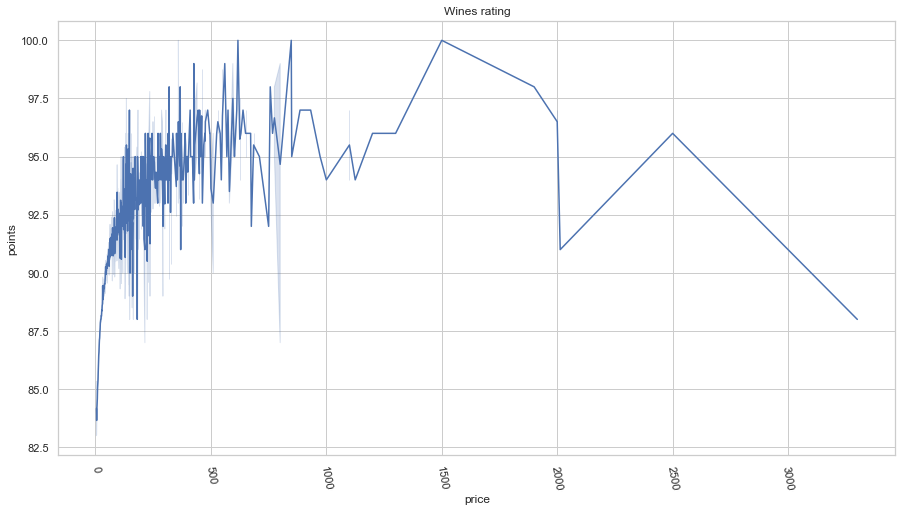

In [82]:
fig,ax = plt.subplots(figsize=(15,8));
sns.set(style="whitegrid")
sns.lineplot( y="points", x='price',ax = ax, data=df).set_title("Wines rating")
plt.xticks(rotation=-80);

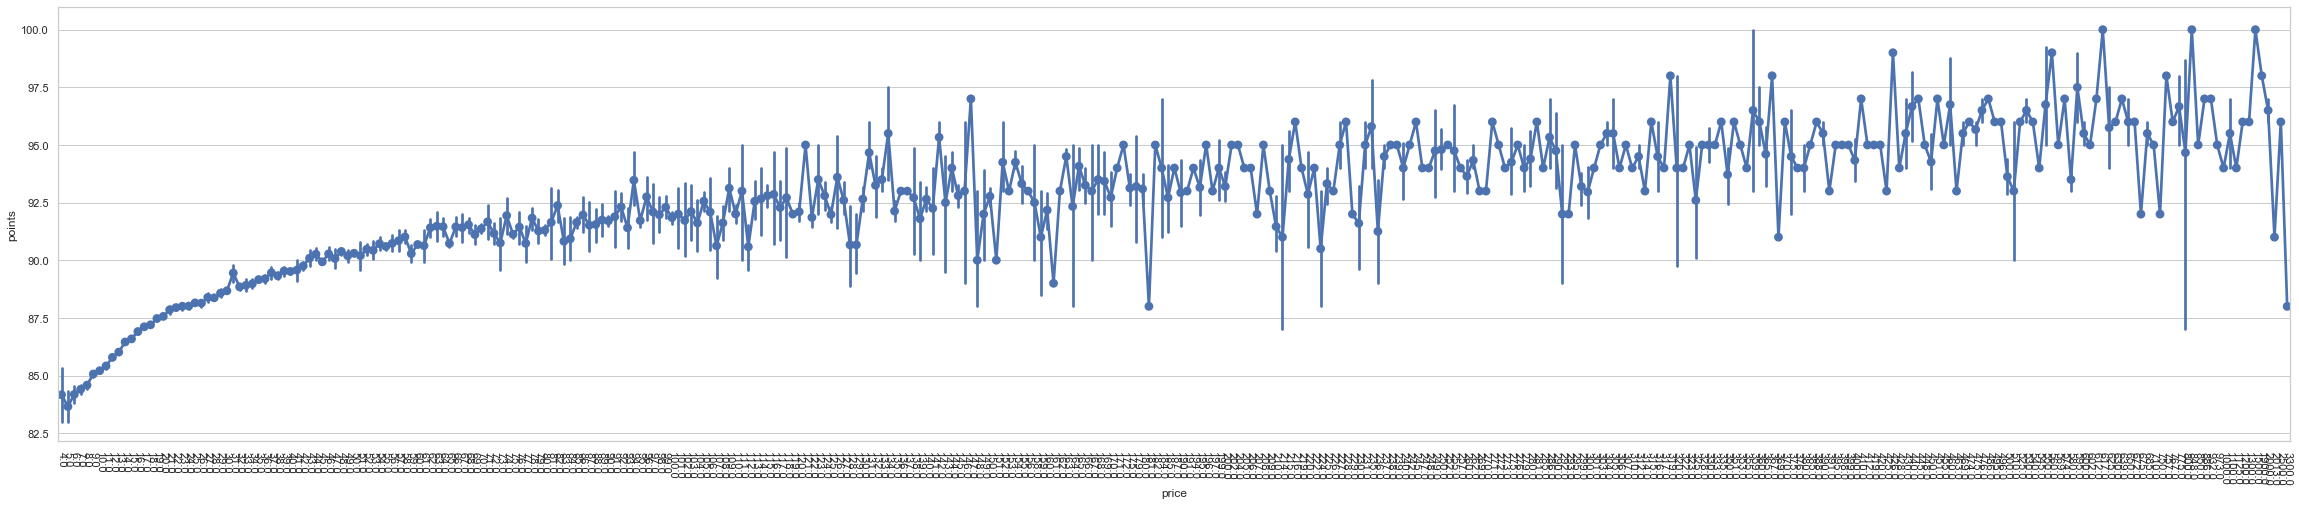

In [83]:
fig,ax = plt.subplots(figsize=(40,8));
sns.pointplot(ax=ax,x='price',y="points",data=df)
plt.xticks(rotation=-90);

In [84]:
def top_rated_wines(point):
    Top_wines = df[['country','points']][(df.points>=point)]
    var = Top_wines.country.unique()
    top_rated_wines
    new_data = pd.DataFrame()
    country_name = []
    rating_mean = [] 
    for x in var:
        a = Top_wines[Top_wines['country']==x]
        b = a.points.mean()
        country_name.append(x)
        rating_mean.append(b)
    new_data['country_name'] = country_name
    new_data['rating_mean'] = rating_mean
    # sorting data frame by rating 
    new_data.sort_values("rating_mean", axis = 0, ascending = False, inplace = True)
    return new_data

In [85]:
topC= top_rated_wines(90)

In [86]:
topC

,country_name,rating_mean
24,Hungary,92.142857
9,England,92.102041
4,France,91.881105
10,Austria,91.801633
0,Italy,91.662973
1,US,91.655187
6,Germany,91.629431
5,Portugal,91.590734
26,Mexico,91.500000
13,Argentina,91.360140


In [87]:
def top_rated_wines(point):
    Top_wines = df[['variety','points']][(df.points>=point)]
    var = Top_wines.variety.unique()
    top_rated_wines
    new_data = pd.DataFrame()
    types = []
    rating_mean = [] 
    for x in var:
        a = Top_wines[Top_wines['variety']==x]
        b = a.points.mean()
        types.append(x)
        rating_mean.append(b)
    new_data['types'] = types
    new_data['rating_mean'] = rating_mean
    # sorting data frame by rating 
    new_data.sort_values("rating_mean", axis = 0, ascending = False, inplace = True)
    return new_data

In [88]:
topW = top_rated_wines(90)

In [89]:
topW

,types,rating_mean
16,Bordeaux-style White Blend,92.320755
0,Nebbiolo,92.009455
11,Champagne Blend,92.008375
3,Pinot Noir,91.943685
6,Bordeaux-style Red Blend,91.860165
12,Cabernet Sauvignon,91.801396
13,Portuguese Red,91.799756
14,Riesling,91.783294
7,Syrah,91.764112
5,Chardonnay,91.705375


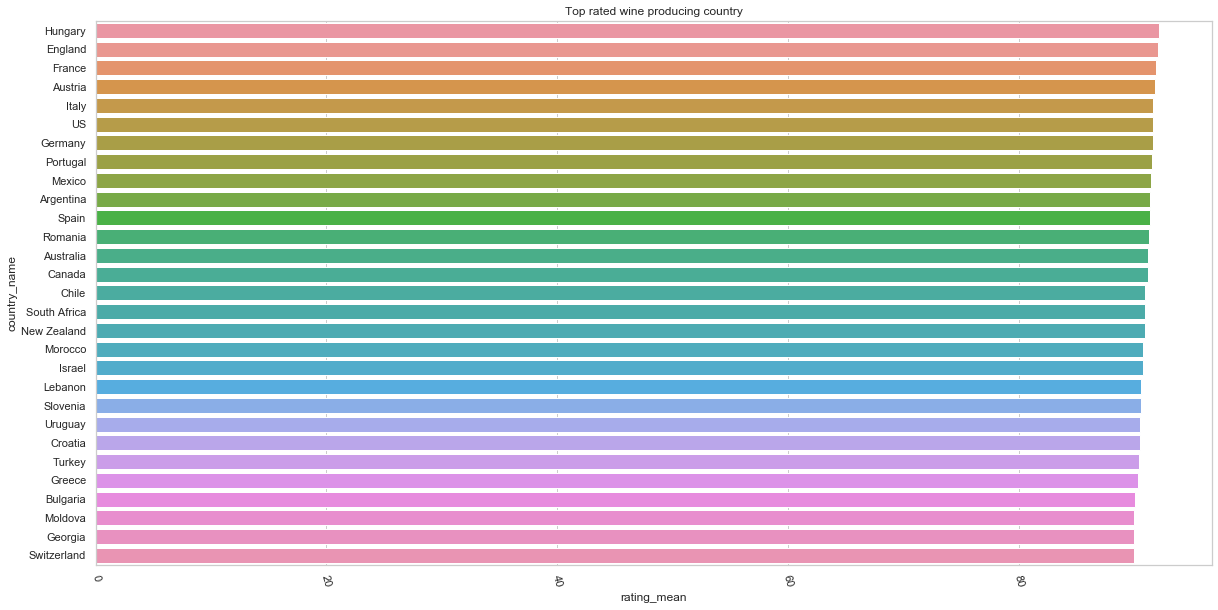

In [90]:
fig,ax = plt.subplots(figsize=(20,10));
sns.barplot( y="country_name", x='rating_mean',ax = ax, data=topC).set_title('Top rated wine producing country')
# Rotate x-labels
plt.xticks(rotation=-75);

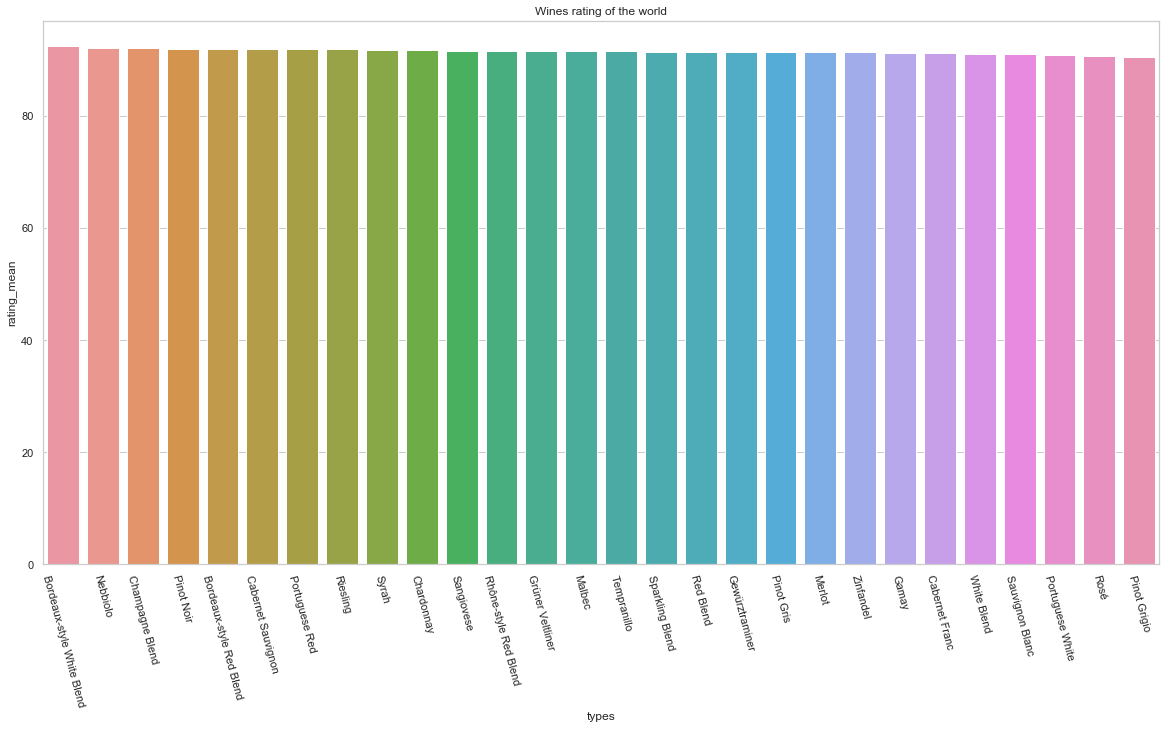

In [91]:
fig,ax = plt.subplots(figsize=(20,10));
sns.set(style="whitegrid")
sns.barplot( y="rating_mean", x='types',ax = ax, data=topW).set_title("Wines rating of the world")
# Rotate x-labels
plt.xticks(rotation=-75);

In [92]:
df['price'].fillna(df['price'].value_counts().idxmax(), inplace=True)

encoded_columns = pd.get_dummies(df['price'])
df = df.join(encoded_columns).drop('price', axis=1)

inp = df['review_description']
out = df['variety']

labelEncoder = LabelEncoder()
out = labelEncoder.fit_transform(out)
out

array([ 5, 17, 11, ...,  6,  0,  3])

In [94]:
inp = inp.str.lower()

In [99]:
from nltk.corpus import stopwords
import re
sw = stopwords.words('english')
list_aux = []
for phase_word in inp:
    list_aux.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
inp = list_aux

In [101]:
countVectorizer = CountVectorizer()
inp = countVectorizer.fit_transform(inp)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(inp, out, test_size=0.33)

In [105]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=len(countVectorizer.get_feature_names())))
model.add(Dense(units=out.max()+1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/2
55380/55380 [==============================] - 30s 536us/step - loss: 1.2983 - accuracy: 0.6286
Epoch 2/2
55380/55380 [==============================] - 29s 518us/step - loss: 0.6681 - accuracy: 0.7948


In [106]:
scores = model.evaluate(X_test, y_test, verbose=1)
print ('Accuracy of the model is %s' % scores[1])

27277/27277 [==============================] - 9s 315us/step
Accuracy of the model is 0.707409143447876
